### TODO
- Add labels and legends to graphs


In [1]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as SK_LogisticRegression


# Custom imports
from LogisticRegression import LogisticRegression
from utils import argsort

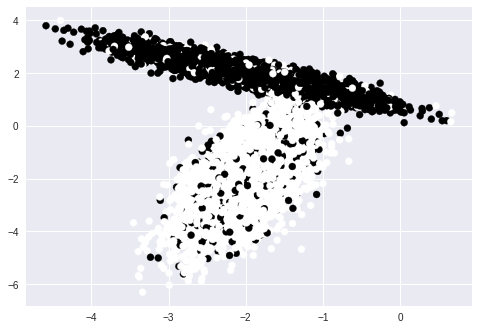

(10000, 2)
(10000,)
[[-2.50955002  2.51767873]
 [-2.22507064 -2.08761579]
 [-2.45921449 -3.21092701]
 [-2.30142675 -3.96263639]
 [-2.30571723 -2.05480314]
 [-0.07832115  0.74761188]
 [-3.18403533  2.63562747]
 [-2.37732815  2.17266899]
 [-2.34242715  2.00469645]
 [-2.14377377 -2.02476636]]
[1 0 0 0 0 1 1 1 1 0]


In [8]:
# DATASET CREATION, DATASET SPLIT

# DATA n1 ---------------------
# Generate Clean data
# X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
# X_train, y_train = X,y 

# Generate noisy Data
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)
X_train, y_train = X,y 

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1], c=y )
plt.show()

print(X_train.shape)
print(y_train.shape)
print(X[:10])
print(y[:10])

In [6]:

# MLFromscratch Logistic Regression
logr = LogisticRegression(n_iters = 1000)
logr.fit(X_train,y_train)
preds, z = logr.predict(X_train)
print(preds)

# Sklearn Logistic regression
logisticRegr = SK_LogisticRegression()
logisticRegr.fit(X_train,y_train)
# logisticRegr.predict(X)
SK_dbound = - ( logisticRegr.intercept_[0] + np.delete(X_train,1, axis=1 ).dot(np.delete(logisticRegr.coef_.T, 1)) ) / logisticRegr.coef_.T[1]


print(z.shape)
print(preds.shape)
print(SK_dbound)

[0.90429794 0.10005553 0.03544158 ... 0.85526397 0.88980986 0.24787278]
(10000,)
(10000,)
[0.2584374  0.21375043 0.25053053 ... 0.24634061 0.17153    0.11243488]


- $g(z) = g(\theta^TX)$
- $z = w_0 + w_1x_1 + w_2x_2$
- Decision Boundary Line : $x_2 = mx_1 + c$
- For $x_1 = 0$ -> $x_2 = \boxed{c = -\frac{w_0}{w_2}}$
- We know that the slope : $m = \frac{y_2-y_1}{x_2-x_1}$ - > $\boxed{m=-\frac{w_1}{w_2}}$

[-5.08783722  1.17009482]
[ 0.66344338 -0.31957352]
-6.803656140793673
4.502065251824917


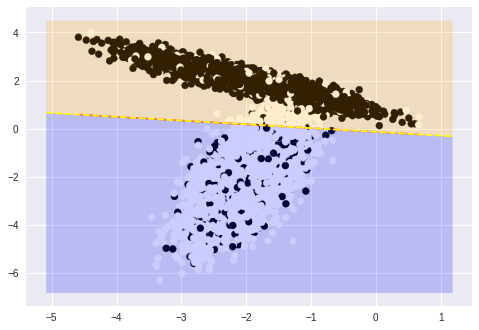

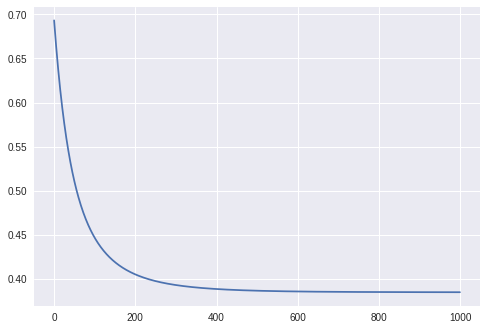

[0.90429794 0.10005553 0.03544158 0.01763149 0.10237966 0.67231917
 0.90952881 0.87232953 0.85340783 0.1062752 ]
[ 2.24591911 -2.19660773 -3.30378459 -4.02027998 -2.17105913  0.71869315
  2.30789518  1.92171473  1.76158315 -2.12936598]
[1 0 0 0 0 1 1 1 1 0]


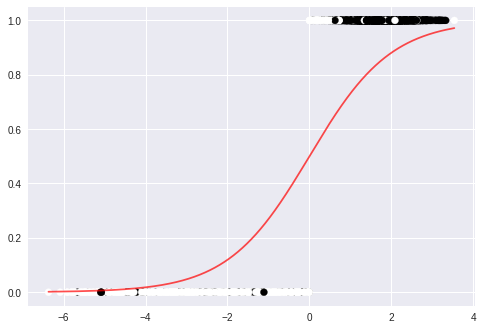

In [9]:
# X-axis Edges and also the X_dbound
x_edges = np.array([X[:, 0].min()-0.5, X[:, 0].max()+0.5])
print(x_edges)

c = -logisticRegr.intercept_[0]/logisticRegr.coef_.T[1]
m = -logisticRegr.coef_.T[0]/logisticRegr.coef_.T[1]

y_dbound = m*x_edges + c
print(y_dbound)

ymin, ymax = X[:, 1].min()-0.5, X[:, 1].max()+0.5
plt.scatter(X[:,0],X[:,1], c=y )
# plt.plot(X_train[:,0], decision_line, '--', color="green", alpha=0.4)
# This one plot all the X-axis
plt.plot(X_train[:,0], SK_dbound, '--', color="red", alpha=0.4)
plt.plot(x_edges, y_dbound, '--', color="yellow")

print(ymin)
print(ymax)

plt.fill_between(x_edges, y_dbound, ymin, color = "blue" , alpha =0.2)
plt.fill_between(x_edges, y_dbound, ymax, color = "orange" , alpha =0.2)

plt.show()

plt.plot(logr.costs)
plt.show()

preds1, z1 = argsort(preds, z)
preds1, y1 = argsort(preds, y_train)

preds_class = [1 if x>=0.5 else 0 for x in preds]

plt.plot(z1,preds1 , color="red", alpha = 0.7)
plt.scatter(z,preds_class, c=y)

print(preds[:10])
print(z[:10])
print(y_train[:10])

In [11]:
# how many data points that have z > 0
print(type(z))

print(np.count_nonzero(z >= 0))
print(np.count_nonzero(preds >= 0.5))

print(np.count_nonzero(z < 0))
print(np.count_nonzero(preds < 0.5))

<class 'numpy.ndarray'>
5200
5200
4800
4800
